# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

641

In [4]:
#checking output file
city_df = pd.read_csv(output_data_file)
city_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#Creating list
city_name = []
cloudiness = []
country = []
date = []
max_temp = []
wind_speed = []
humidity = []
lat = []
lng = []
i = 0

#creating url
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
url_api = url + weather_api_key

#viewing info
weather_info = requests.get(url_api).json()
pprint(weather_info)

{'city': {'coord': {'lat': 55.7522, 'lon': 37.6156},
          'country': 'RU',
          'id': 524901,
          'name': 'Moscow',
          'sunrise': 1587262429,
          'sunset': 1587314578,
          'timezone': 10800},
 'cnt': 40,
 'cod': '200',
 'list': [{'clouds': {'all': 100},
           'dt': 1587265200,
           'dt_txt': '2020-04-19 03:00:00',
           'main': {'feels_like': 269.97,
                    'grnd_level': 993,
                    'humidity': 89,
                    'pressure': 1009,
                    'sea_level': 1009,
                    'temp': 274.13,
                    'temp_kf': 0.35,
                    'temp_max': 274.13,
                    'temp_min': 273.78},
           'sys': {'pod': 'd'},
           'weather': [{'description': 'overcast clouds',
                        'icon': '04d',
                        'id': 804,
                        'main': 'Clouds'}],
           'wind': {'deg': 236, 'speed': 2.98}},
          {'clouds': {'all': 100}

In [6]:
print (f'-----------------------------')
print (f'Beginning Data Retrieval')
print (f'-----------------------------')

#loop through info
for city in cities:
    weather_data = requests.get(url_api + "&q=" + city + "&units=Imperial")
    weather_data_json = weather_data.json()
    
    #try to find the information
    try:
        city_name.append (weather_data_json ['city']['name'])
        country.append(weather_data_json['city']['country'])
        lat.append(weather_data_json['city']['coord']['lat'])
        lng.append(weather_data_json['city']['coord']['lon'])
        cloudiness.append (weather_data_json ['list'][0]['clouds']['all'])
        date.append(weather_data_json['list'][0]['dt'])
        humidity.append(weather_data_json['list'][0]['main']['humidity'])
        max_temp.append(weather_data_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_data_json['list'][0]['wind']['speed'])
        i += 1 
        print(f'Processing city {i} | {city}')
        
    except:
        print ('No City Located!')
        pass
    
print (f'-----------------------------')
print (f'End of Data Retrieval')
print (f'-----------------------------')

-----------------------------
Beginning Data Retrieval
-----------------------------
Processing record 1 | arlit
Processing record 2 | naze
Processing record 3 | barrow
Processing record 4 | padang
Processing record 5 | port macquarie
Processing record 6 | albany
Processing record 7 | mikhaylovsk
Processing record 8 | dong hoi
Processing record 9 | bambous virieux
Processing record 10 | svetlaya
Processing record 11 | saskylakh
Processing record 12 | palana
Processing record 13 | denpasar
Processing record 14 | atuona
Processing record 15 | ushuaia
Processing record 16 | waipawa
Processing record 17 | vardo
Processing record 18 | airai
Processing record 19 | mataura
Processing record 20 | saldanha
Processing record 21 | khatanga
No City Located!
Processing record 22 | narsaq
Processing record 23 | busselton
Processing record 24 | amahai
Processing record 25 | punta arenas
No City Located!
Processing record 26 | constitucion
No City Located!
Processing record 27 | longyearbyen
Processin

Processing record 240 | west point
Processing record 241 | grand-lahou
Processing record 242 | baoding
Processing record 243 | coihaique
No City Located!
Processing record 244 | sironj
Processing record 245 | margate
No City Located!
Processing record 246 | gondar
Processing record 247 | port hedland
Processing record 248 | kaniama
Processing record 249 | avera
Processing record 250 | sfantu gheorghe
Processing record 251 | corrente
Processing record 252 | college
Processing record 253 | rongcheng
Processing record 254 | san andres
Processing record 255 | eatonton
Processing record 256 | ouadda
Processing record 257 | tuy hoa
Processing record 258 | rovaniemi
Processing record 259 | harper
Processing record 260 | pontianak
Processing record 261 | tinskoy
No City Located!
Processing record 262 | moussoro
Processing record 263 | nabire
Processing record 264 | byron bay
Processing record 265 | phan thiet
Processing record 266 | faya
Processing record 267 | dogondoutchi
Processing record 2

Processing record 475 | zwedru
Processing record 476 | rio grande
Processing record 477 | gaoual
No City Located!
Processing record 478 | shellbrook
Processing record 479 | luwingu
Processing record 480 | koumac
No City Located!
Processing record 481 | zhuanghe
Processing record 482 | xinye
No City Located!
Processing record 483 | murgab
Processing record 484 | howard springs
Processing record 485 | peterborough
Processing record 486 | sillanwali
Processing record 487 | axim
Processing record 488 | kavaratti
Processing record 489 | tshikapa
Processing record 490 | lieksa
Processing record 491 | toila
Processing record 492 | brylivka
Processing record 493 | mount darwin
Processing record 494 | zhigansk
Processing record 495 | goba
Processing record 496 | biskamzha
Processing record 497 | inuvik
Processing record 498 | caravelas
Processing record 499 | kloulklubed
Processing record 500 | kodiak
No City Located!
Processing record 501 | pendleton
Processing record 502 | doune
Processing re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_dict = {
    "City": city_name,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": max_temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind_speed
}
weather_df = pd.DataFrame(weather_dict)
weather_df.count()

City          588
Cloudiness    588
Country       588
Date          588
Humidity      588
Temp          588
Lat           588
Lng           588
Wind Speed    588
dtype: int64

In [11]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,Arlit,0,NE,1587265200,12,81.39,18.7369,7.3853,7.20
1,Naze,100,JP,1587265200,75,74.79,28.3667,129.4833,15.79
2,Barrow,57,US,1587265200,94,8.60,71.2906,-156.7887,7.58
3,Padang,16,ID,1587265200,66,86.52,-0.9492,100.3543,1.05
4,Port Macquarie,9,AU,1587265200,65,73.02,-31.4333,152.9167,5.70


In [13]:
weather_df.to_csv('../output_data/my_weather_data.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

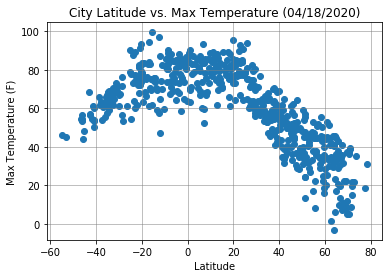

In [22]:
scatlat = weather_df["Lat"]
scattemp = weather_df["Temp"]
plt.scatter(scatlat,scattemp)
plt.grid(color='gray', linestyle='-', linewidth=.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (04/18/2020)')
plt.savefig('../output_data/lat_vs_maxtemp.png')
plt.show()

In [ ]:
# As latitude moves away from 0 the temperature decreases 

#### Latitude vs. Humidity Plot

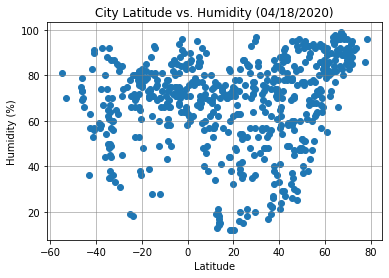

In [30]:
humidity = weather_df["Humidity"]
plt.scatter(scatlat,humidity)
plt.grid(color='gray', linestyle='-', linewidth=.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (04/18/2020)')
plt.savefig('../output_data/lat_vs_humidity.png')
plt.show()

In [ ]:
#Dont see a direct correlation with latitude and humidity. We can see a larger humidity percentage with increasing latitude. 

#### Latitude vs. Cloudiness Plot

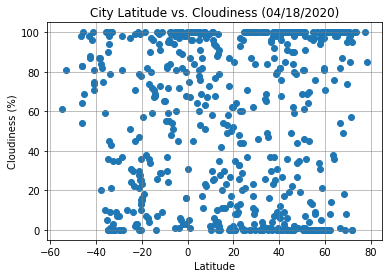

In [37]:
cloudiness = weather_df["Cloudiness"]
plt.scatter(scatlat,cloudiness)
plt.grid(color='gray', linestyle='-', linewidth=.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (04/18/2020)')
plt.savefig('../output_data/lat_vs_cloudiness.png')
plt.show()

In [ ]:
# no correlation between latitude and cloudiness percentage 

#### Latitude vs. Wind Speed Plot

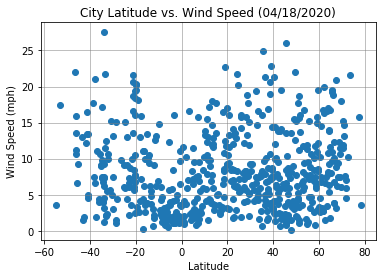

In [43]:
wind_speed = weather_df["Wind Speed"]
plt.scatter(scatlat,wind_speed)
plt.grid(color='gray', linestyle='-', linewidth=.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (04/18/2020)')
plt.savefig('../output_data/citylat_vs_windspeed.png')
plt.show()

In [44]:
# Relative low windspeed at 0 latitude and increasing as you move from 0. 

## Linear Regression

In [45]:
# OPTIONAL: Create a function to create Linear Regression plots


In [46]:
# Create Northern and Southern Hemisphere DataFrames
nh_df = weather_df.loc[weather_df["Lat"] >= 0,:]
sh_df = weather_df.loc[weather_df["Lat"] < 0,:]

nh_df.head()

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,Arlit,0,NE,1587265200,12,81.39,18.7369,7.3853,7.20
1,Naze,100,JP,1587265200,75,74.79,28.3667,129.4833,15.79
2,Barrow,57,US,1587265200,94,8.60,71.2906,-156.7887,7.58
5,Albany,1,US,1587265200,92,35.26,42.6001,-73.9662,7.31
6,Mikhaylovsk,49,RU,1587265200,78,47.12,45.1283,42.0256,2.28


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


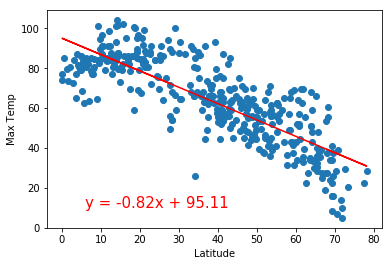

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


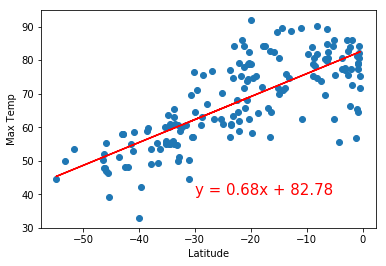

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


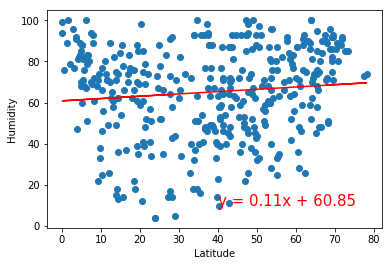

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


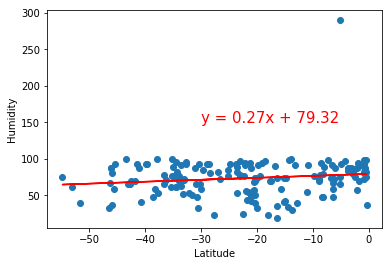

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


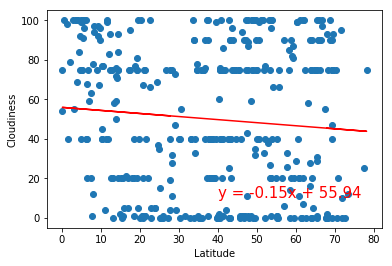

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


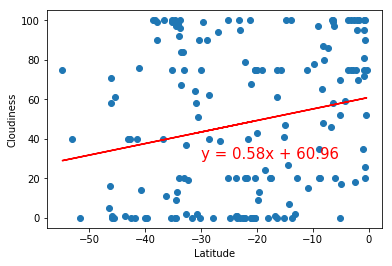

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


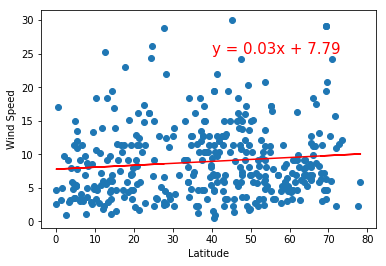

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


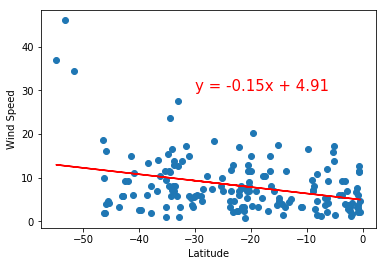